# Quantum Algorithms Practical Session 1  - Starting with Qiskit

---



In this practical session you will learn how to do and run your first quantum computation with Qiskit

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/qiskit.png'  width="440px" />    
    </tr>
</table>

Qiskit is an open-source framework for quantum computing​ based on Python. It allows to generate quantum circuits, run them on quantum simulator and/or on the IBM Quantum computers.

Part of the commands introduced in this session are borrowed from the Ep 3 of the video serie Coding with Qiskit: [Qiskit Season 1 Ep 3](https://www.youtube.com/watch?v=RrUTwq5jKM4}), do not hesitate to watch the videos as well.


---

## Import Qiskit
One first need to import Qiskit to be able to use the qiskit commands with Python

```Python
from qiskit import* 
```

   

In [1]:
from qiskit import*

A quantum computation is often presented in the circuit formalism

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/circuit.png'  width="440px" />    
    </tr>
</table>



### Create a circuit
Thus the first thing to do is to create a circuit that will be made of quatum register (the wires that manipulates qubits) and classical registers (the wire where the values of the measurement will be recorded).

To create a circuit we need to specify the number of quantum registers and classical registers and create the cirtuit. Let us start with a one qubit circuit:

```Python
qr=QuantumRegister(1)
cr=ClassicalRegister(1)
circuit=QuantumCircuit(qr,cr)
```

In [2]:
qr=QuantumRegister(1)
cr=ClassicalRegister(1)
circuit=QuantumCircuit(qr,cr)

### Vizualisation

To see our circuit one can use the following command:
```Python
%matplotlib inline
circuit.draw('mpl')
```



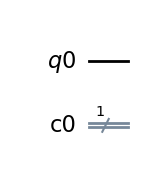

In [3]:
circuit.draw('mpl')

### Adding gates

We will perform quantum operation on the qubit defined by the quantum register 0, i.e. qr[0]. Quantum operations are implemented by quantum gates, i.e. unitary matrices acting on the quantum state. Here are a couple of quantum gates implemented in Qiskit: The Hadamard matrix, the NOT gate, the Z-gate

$$H=\frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix},
X=\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}, Z=\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}
$$

To add a Hadamard gate to the circuit we use the command:

```Python
circuit.h(qr[0])
```
Note that qr[0] indicates to which quantum register (so far there is only one), the gate will be added to.
You can visualize the result by using again

```Python
circuit.draw('mpl')
```

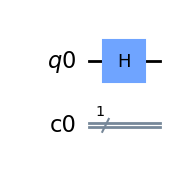

In [4]:
circuit.h(qr[0])
circuit.draw('mpl')

### Adding Measure operators

Once we have done as many operation on our circuit one can apply measurement operators. This is achieved by the command
```Python
circuit.measure(qr,cr)
```

Here all quantum register will be measured and their results will be recorded in the classical register. You can specify the quantum register to be measured by choosing specific wire (qr[0], qr[1], etc..)

In [5]:
circuit.measure(qr,cr)

## Run the circuit

Once your circuit is properly generated you can run it on your own computer using the quantum simulator Qasam or run it on a real quantum device through the IBM Experience


### Run on Qasm (quantum simulator)

One first need to import the simulator from Aer. Qiskit Aer is an element of qiskit that provides the simulator

```Python
simulator=Aer.get_backend('qasm_simulator')
```

Then to execute and get the result of this computation, one need the execute and result  commands

```Python
result=execute(circuit,backend = simulator,shots=1024).result()
counts=result.get_counts()
```

It is then possible to visualize the outcomes of the calculation by importing the plot_histogram visualization tool.

```Python
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)
```

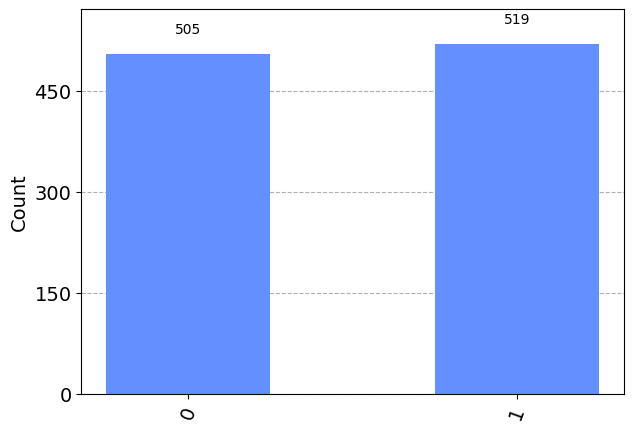

In [6]:
simulator=Aer.get_backend('qasm_simulator')
result=execute(circuit,backend = simulator,shots=1024).result()
counts=result.get_counts()

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

You can also gets the result by just printing the outcomes of the calculation
```Python
print(counts)
```

In [7]:
print(counts)

{'0': 505, '1': 519}


###  Run on the IBM Quantum Computer

To run your circuit on a real quantum device you should first load your IBM account
```Python
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
qcomputer=provider.get_backend('ibm_brisbane')
```
Note that the IBM program proposes several quantum machine including

'ibm_hanoi'
'ibmq_mumbai'
'ibmq_sherbrooke'

Check directly on the IBM Quantum Experience the different type of machine you may have access to.

Now one can execute the program with the same execute command as we did with the simulator

```Python
job=execute(circuit,backend=qcomputer)
```

Because there may be waiting time for the circuit to be run on a the real quantum device you can monitor the execution of the program with the following command

```Python
from qiskit.tools.monitor import job_monitor
job_monitor(job)
```

Once the circuit has been executed you get the result with the command result

```Python
result=job.result()
plot_histogram(result.get_counts(circuit))
```

In [8]:
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
qcomputer=provider.get_backend('ibm_brisbane')
job=execute(circuit,backend=qcomputer)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result=job.result()
plot_histogram(result.get_counts(circuit))


C:\Users\propietario\AppData\Local\Temp\ipykernel_9688\2744985676.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
C:\Users\propietario\AppData\Local\Temp\ipykernel_9688\2744985676.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


IBMQAccountCredentialsNotFound: 'No IBM Quantum Experience credentials found.'


## Two qubit circuit and entanglement

We have worked with a very simple circuit based on only one qubit manipulation. When one works with several qubit one can apply gates acting on several qubit. A very important gate is the CNOT gate or Controlled NOT gate. When apply on two qubit registers, the gate apply a NOT on the second register if the state of the first qubit is $|1>$.

The matrix of this 2-qubit gate is in the standard basis given by
$$CNOT=\begin{pmatrix}
1 & 0 &0 &0 \\
0 & 1 & 0 & 0\\
0 & 0 & 0  & 1\\
0 & 0 & 1  & 0
\end{pmatrix}$$

The symbol used for this gate is 
<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/cnot.png'  width="150px" />    
    </tr>
</table>

The qiskit command to apply a CNOT gate should specify first the control qubit and then the target qubit:

```Python
circuit.cx(qr[0],qr[1])
```

Create the following circuit with Qiskit   

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/epr.png'  width="440px" />    
    </tr>
</table>

And measure it in the standard basis with the simulator and a quantum machine.

In [ ]:
circuit.cx(qr[0],qr[1])

## Measuring a state in an alternative basis (optional)

The command 'measure' only allows to make single qubit measurement in the standard basis $|0>,|1>$, however it is possible to make a measurement in any basis $|u_1>,|u_2>$ by making a rotation before the measurement.

Suppose the unitary matrix $U$ is the change of basis from $|u_1>, |u_2>$ to the standard basis $|0>,|1>$. Then applying $U$ and a measurement in the the $Z$-basis is equivalent to making a measurment in the $|u_1>,|u_2>$ basis.

For example for a measurement in the $X$-basis of the quantum register $i$ we first apply the rotation given by the Hadamard matrix:
```Python
circuit.h(qr[i])
circuit.measure(qr[i],cr[i])
```

For measuring in the $Y$-basis ($\frac{|0>+i|1>}{\sqrt{2}}, \frac{|0>-i|1>}{\sqrt{2}}$ the change of basis is obtained by applying the matrices $S^\dagger=\begin{pmatrix}
1 & 0\\
0 & e^{-i\pi/2}
\end{pmatrix}$ and $H$:

```Python
circuit.sdg(qr[i])
circuit.h(qr[i])
circuit.measure
```


Let us illustrate this principle with an example. Consider the state $|\psi>=\frac{1}{2}|0>+i\frac{\sqrt{3}}{2}|1>\equiv\cos(\pi/3)|0>+e^{i\pi}\sin(\pi/3)|1>$ and suppose we want to measure it in the $X$-basis $(|+>,|->)$.

Apply the $H$ matrix and one gets the state $|\psi'>=\frac{1+i\sqrt{3}}{2\sqrt{2}}|0>+\frac{1-i\sqrt{3}}{2\sqrt{2}}|1>\equiv \cos(\pi/4)|0>+\sin(\pi/4)e^{-2\pi/3}|1>$

Use the following code to visualize the effect of the $H$ rotation on $|\psi>$ and convince yourself that measuring $|\psi>$ in the $X$ basis is equivalent to measuring $|\psi'>$ in the standard basis:

```Python
import numpy as np
from qiskit_textbook.widgets import plot_bloch_vector_spherical
plot_bloch_vector_spherical([2*np.pi/3,np.pi,1])
plot_bloch_vector_spherical([np.pi/2,-2*np.pi/3,1])
                  ```

In [ ]:
circuit.h(qr[i])
circuit.measure(qr[i],cr[i])

circuit.sdg(qr[i])
circuit.h(qr[i])
circuit.measure

In [ ]:
import numpy as np
from qiskit_textbook.widgets import plot_bloch_vector_spherical
plot_bloch_vector_spherical([2*np.pi/3,np.pi,1])
plot_bloch_vector_spherical([np.pi/2,-2*np.pi/3,1])

## Exercises

### Exercise 1 (super dense conding)

The super dense coding protocol is a communication protocol that allows to transmit two classical bit by sending only one qubit. It was created in Bennet and Wiesner.
The following circuit represents the protocol:

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/superdense.png'  width="440px" />    
    </tr>
</table>

Alice and Bob have each of them one qubit of an entangled EPR states
$$|EPR>=\dfrac{1}{\sqrt{2}}(|00>+|11>)$$
Then if Alice wants to send the two classical bits $(b_1,b_2)$ with $b_1, b_2 \in\{0,1\}$, she first applies $X^{b_2}$ then $Z^{b_1}$ to her qubit and send it to Bob (if $b_i=0$ she applies the identity matrix). Then Bob applies the CNOT gate and the Hadamard gate on the first register and measures the two qubit.

Implement the protocol and check that in all four cases, Alice is transmetted two classical bits by only sending one qubit.

### Exercise 2: Quantum Teleportation

The quantum teleportation protocol allows to transfer the information (amplitudes) defining a qubit $|\psi>$ to another qubit by taking advantage of entanglement.

Here is the circuit corresponding to the protocol
<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/teleportation2.png'  width="440px" />    
    </tr>
</table>

This protocol insures that the qubit $|q_1>$ on the quantum register $0$ will be in the quantum register $2$ ($|q_3>$) at the end of the protocol.

The following video [Coding with Qiskit Season 1 Ep 5](https://www.youtube.com/watch?v=mMwovHK2NrE) could be of some help.

1) Prepare the qubit $|q_1>$ such that $|q_1>=|1>$ and check that the measurement of the last qubit gives $1$ with probability $1$.

2) Same question with $|q_1>=|+>$. How do you check that the last qubit in in state $|+>$ at the end of the procotol ?

3) (more difficult) Can you preparer any state $|q_1>=|\psi>$ and provide some argument to check that the qubit $|\psi>$ has been teleported at the end of the procotol ? (you may need to use the $U_3$ gate of qiskit and read the optional section on "Measurement in an alternative basis"

